# Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

# 1º Preprocesado y adecuación del Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('./movies.dat', sep='::', encoding='utf-8', engine='python')
df_movies

,indice,pelicula,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


* Añadimos en movies.dat la primera fila; indice::pelicula::genero, para poder eliminar el indice.

In [3]:
df_movies = df_movies.drop(['indice'], axis=1)
df_movies.columns

Index(['pelicula', 'genero'], dtype='object')

In [4]:
df_movies

,pelicula,genero
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
...,...,...
3878,Meet the Parents (2000),Comedy
3879,Requiem for a Dream (2000),Drama
3880,Tigerland (2000),Drama
3881,Two Family House (2000),Drama


* Dividimos la columna de pelicula, quitando el año, generando una nueva columna. Para ello seleccionamos las posiciones por detrás que coinciden con lo que queremos añadir a la nueva columna.

In [5]:
df_movies['año'] = df_movies.pelicula.str.slice(-5,-1)
df_movies['pelicula'] = df_movies.pelicula.str.slice(0,-6)

df_movies.head(10)

,pelicula,genero,año
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995
5,Heat,Action|Crime|Thriller,1995
6,Sabrina,Comedy|Romance,1995
7,Tom and Huck,Adventure|Children's,1995
8,Sudden Death,Action,1995
9,GoldenEye,Action|Adventure|Thriller,1995


* Ahora nos quedamos con un solo género por película. Primero elim,inamos la barra espaciadora.

In [6]:
df_movies['genero'] = df_movies.genero.str.split('|')
df_movies.head(10)

,pelicula,genero,año
0,Toy Story,"[Animation, Children's, Comedy]",1995
1,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,Grumpier Old Men,"[Comedy, Romance]",1995
3,Waiting to Exhale,"[Comedy, Drama]",1995
4,Father of the Bride Part II,[Comedy],1995
5,Heat,"[Action, Crime, Thriller]",1995
6,Sabrina,"[Comedy, Romance]",1995
7,Tom and Huck,"[Adventure, Children's]",1995
8,Sudden Death,[Action],1995
9,GoldenEye,"[Action, Adventure, Thriller]",1995


In [7]:
df_movies['genero'] = df_movies.genero.str[0].str.strip()
df_movies.head(10)

,pelicula,genero,año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
5,Heat,Action,1995
6,Sabrina,Comedy,1995
7,Tom and Huck,Adventure,1995
8,Sudden Death,Action,1995
9,GoldenEye,Action,1995


In [8]:
df_movies.head(20)

,pelicula,genero,año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
5,Heat,Action,1995
6,Sabrina,Comedy,1995
7,Tom and Huck,Adventure,1995
8,Sudden Death,Action,1995
9,GoldenEye,Action,1995


* Ahora tenemos que cambiar el orden de las columnas (pelicula, año y género).

In [9]:
col = df_movies.pop('año')
df_movies.insert(loc= 1 , column= 'año', value= col)
df_movies

,pelicula,año,genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [10]:
df_movies.dtypes

pelicula    object
año         object
genero      object
dtype: object

In [11]:
df_movies['año'] = df_movies['año'].astype('int64')

In [12]:
df_movies['pelicula'] = df_movies['pelicula'].astype('category')
df_movies['genero'] = df_movies['genero'].astype('category')


In [13]:
df_movies.dtypes

pelicula    category
año            int64
genero      category
dtype: object

In [14]:
df_movies.head(20)

,pelicula,año,genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
5,Heat,1995,Action
6,Sabrina,1995,Comedy
7,Tom and Huck,1995,Adventure
8,Sudden Death,1995,Action
9,GoldenEye,1995,Action


# 2º Graficar visalizaciones

### ¿En qué año se estrenaron más películas?

Utilizamos un displot, sin añadirle ninguna propiedad y nos mostrará la gráfica.

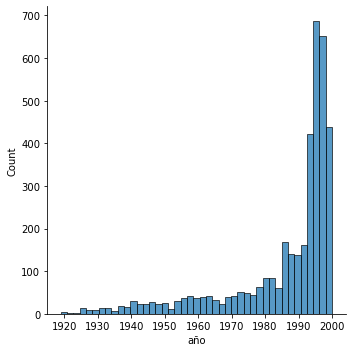

In [41]:
sns.displot(data=df_movies, x='año')
plt.show()

**Interpretación**

El mayor número de estrenos por año se situa a final de la década de los '90, llegando casi a las setecientas películas estrenadas en en el mercado que analiza el data set.


### ¿Qué género destaca más en el cine?


Utilizamos un displot, para ver que género aparece con las frecuencia, y le añadiremos las siguiente propiedades;

Kind: para decirle el tipo de gráfico, en este caso utilizamos uno por densidad

Legend; para que nos aparezca la leyenda

Palette: las tonalidades que queremos darle

Alpha: la transparencia

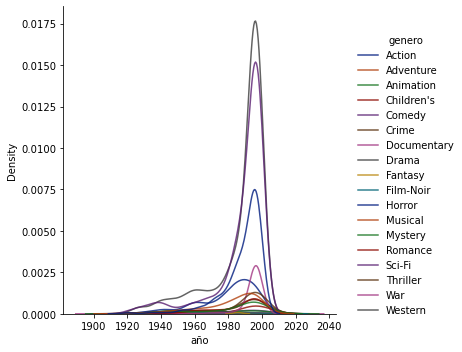

In [26]:
sns.displot(data=df_movies, x='año',hue='genero',kind='kde',legend=True,palette='dark',alpha=.80)
plt.show()

**Interpretación**

Este gráfico de densidad nos muestra que el género más utilizado es acción y que el groso de las peplículas atribuibles a este género se concentra en las décadas de los '80 y los '00.